urban_plume_4m_0001_00000012.nc


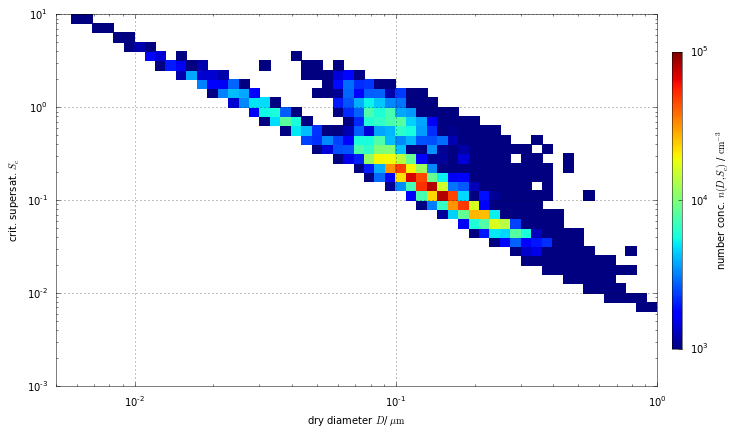

In [1]:
%matplotlib inline
import sys, os
sys.path.append("../../tool")
import mpl_helper
import matplotlib
import matplotlib.cm
import matplotlib.ticker
import matplotlib.pyplot as plt
import partmc_new as partmc
import scipy.io, numpy as np

from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

# Sets the size of the plots
width_in = 10.0

#def make_plot(dir_name,in_filename,out_filename):
def make_plot(dir_name, in_filename):
    ncf = scipy.io.netcdf.netcdf_file(dir_name+in_filename, 'r')
    
    particles = partmc.aero_particle_array_t(ncf)
    env_state = partmc.env_state_t(ncf)
    ncf.close()

    dry_diameters = particles.dry_diameters() * 1e6

    s_crit = (particles.critical_rel_humids(env_state) - 1)*100
    
    x_axis = partmc.log_grid(min=1e-3,max=1e1,n_bin=100)
    y_axis = partmc.log_grid(min=1e-3,max=1e2,n_bin=50)

    hist2d = partmc.histogram_2d(dry_diameters, s_crit, x_axis, y_axis, weights = particles.num_concs)

    hist2d = hist2d * 1e-6

    (figure, axes_array, cbar_axes_array) = mpl_helper.make_fig_array(1,1, figure_width=width_in,
                                    top_margin=0.5, bottom_margin=0.45,
                                    left_margin=0.65, right_margin=1,
                                    vert_sep=0.3, horiz_sep=0.3,
                                    colorbar="shared", colorbar_location="right")

    axes = axes_array[0][0]
    cbar_axes = cbar_axes_array[0]
    p = axes.pcolor(x_axis.edges(), y_axis.edges(), hist2d.transpose(), 
            norm = matplotlib.colors.LogNorm(vmin=1e3, vmax=1e5), linewidths = 0.1)
    axes.set_xscale("log")
    axes.set_yscale("log")
    axes.set_ylabel(r"crit. supersat. $S_{\rm c}$")
    axes.set_xlabel(r"dry diameter $D$/ $\rm \mu m$")
    axes.set_ylim(1e-3,10)
    axes.set_xlim(5e-3, 1e0)
    axes.grid(True)
    cbar = figure.colorbar(p, cax=cbar_axes, format=matplotlib.ticker.LogFormatterMathtext(),
                orientation='vertical')
    cbar_axes.xaxis.set_label_position('top')
    cbar.set_label(r"number conc. $n(D,S_{\rm c})$ / $\rm cm^{-3}$")
    
    mpl_helper.remove_fig_array_axes(axes_array)
    #figure.savefig(out_filename)
    #plt.close()
    
dir_name = "data_new/"

#for counter in range(1, 25):
    #print "counter = ",  counter

    #filename_in = "urban_plume_0001_0000%04d.nc" % counter
    #filename_out = "figs/2d_sc_4m_%04d.pdf" % (counter-1)
    #print filename_in
    #print filename_out

    #make_plot(dir_name, filename_in, filename_out)
    #make_plot(dir_name, filename_in)

#for counter in range(1, 25):
#    print "counter = ",  counter
#
#    filename_in = "urban_plume_2m_0001_0000%04d.nc" % counter
#    filename_out = "figs/2d_sc_2m_%04d.pdf" % (counter-1)
#    print filename_in
#    print filename_out

    #make_plot(dir_name, filename_in, filename_out)
    
def plot_data(time):
    filename = "urban_plume_4m_0001_0000%04d.nc" % time
    print filename
    make_plot(dir_name, filename)
    
interact(plot_data,
         time=widgets.IntSlider(min=1,max=25,value=1))